### Example 1: Extract spectrogram

In [5]:
####### load audio
import essentia.standard
from pylab import imshow, show
import matplotlib.pyplot as plt
import numpy

mono_loader = essentia.standard.MonoLoader(filename = 'vitosha_short.mp3', sampleRate = 44100)
audio_samples = mono_loader()

In [27]:
######### extract spectrogram frame-by-frame

### frame parameters

frame_size = 1024
hop_size = 512

window = Windowing(type = 'hann')
spectrum = Spectrum(size=frame_size) 


### loop in audio
spectrogram = []

for audio_frame in FrameGenerator(audio_samples, frameSize = frame_size, hopSize = hop_size):
    window_current = window(audio_frame)
    spectrum_current = spectrum(window_current)
    spectrogram.append(spectrum_current[:64])

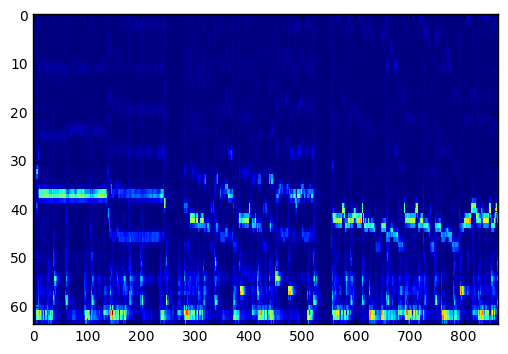

In [7]:
#### plot
spectrogram = essentia.array(spectrogram).T

imshow(numpy.flipud(spectrogram), aspect = 'auto', interpolation='none')
show() 

### Example 2:  Extract pitch of predominant instrument

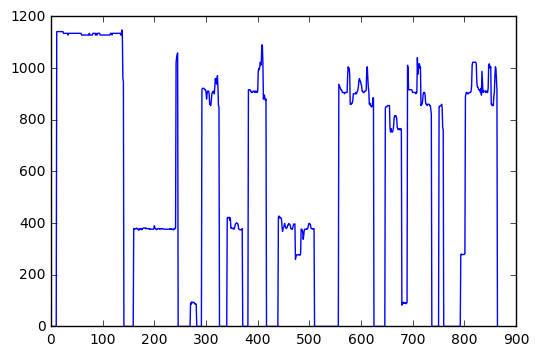

In [6]:
## predominant melody extraction 
from essentia.standard import PredominantPitchMelodia

pitchTracker = PredominantPitchMelodia(frameSize = frame_size, hopSize = hop_size, 
        voicingTolerance = 1.4,  guessUnvoiced=True)

pitch, pitchConf = pitchTracker(audio_samples)
plt.plot(pitch)
show()

### Example 3: Extract beats

In [26]:
### load beatTracker class
bt = BeatTrackerMultiFeature()
beats, _ = bt(audio_samples)


# mark extracted beats by sound
output_filename = 'vitosha_short_beats.mp3'
marker = AudioOnsetsMarker(onsets = beats, type = 'beep')
marked_audio = marker(audio_samples)
MonoWriter(filename = output_filename)(marked_audio)


In [25]:
import json

beats = [ 0.41795918,    1.23065758,    2.04335594,
  2.83283448,  3.2507937,  4.04027224,    4.82975054,
    5.6424489,     6.4319272,     7.23301554,
    8.01088428,  8.80036259,  9.60145092]

fb= open('vitosha_short.beats','w')
json.dump(beats, fb)
fb.close()